# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель исследования**

Построить автоматизированную систему для определения рыночной стоимости объектов недвижимости, а также установить условвия для выявления аномалий и мошенничества.

**План работы**

1. Выгрузить датафрейм с данными
2. Посмотреть общую информацию таблицы
3. Предобработать данные: заполнить пропуски, изменить тип данных и т. д.
4. Добавить столбцы для анализа
5. Проанализировать данные
6. Сделать общий вывод

**Входные данные от сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.**

### Загрузка данных

In [ ]:
# импортируем библиотеки pandas и matplotlib

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [ ]:
# выводим первые 20 строчек датафрейма

data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
# выводим основную информацию о датафрейме

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

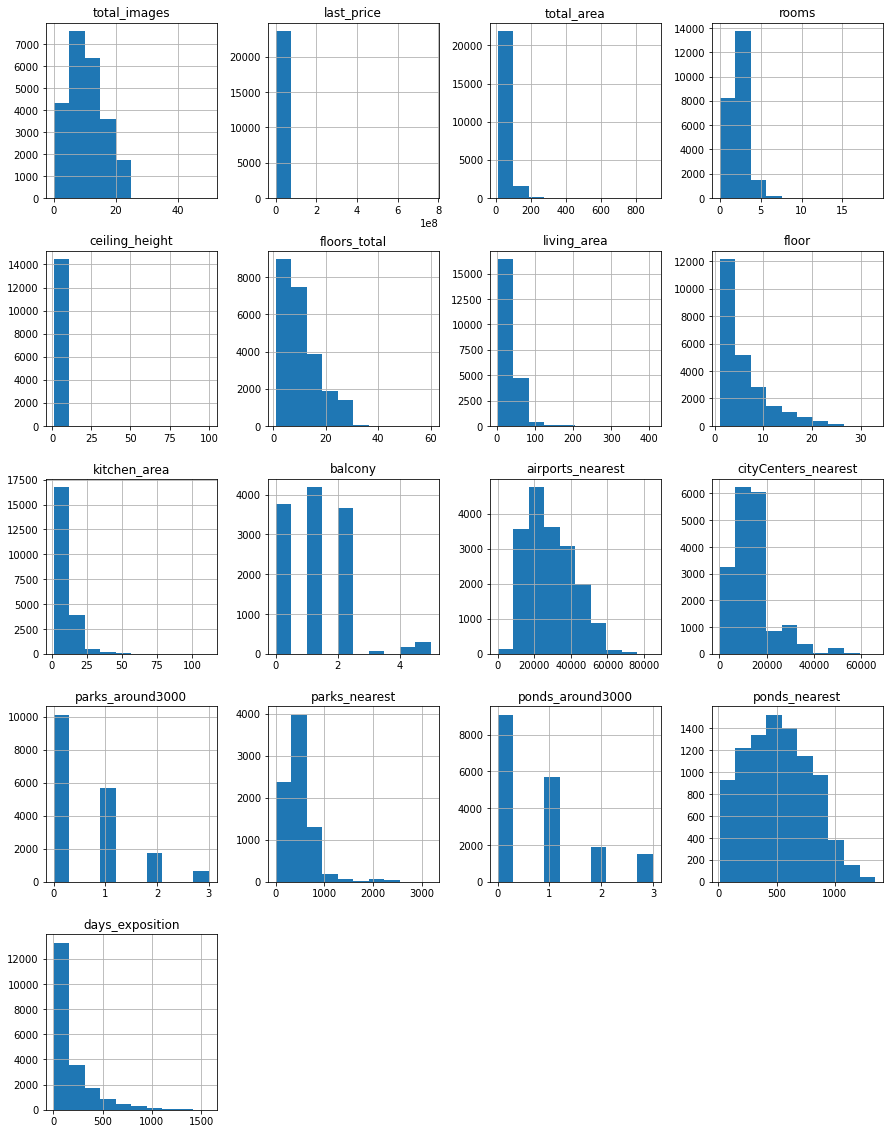

In [ ]:
# построим гистограммы для всех числовых столбцов

data.hist(figsize=(15, 20))

In [ ]:
# выводим названия всех колонок

data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [ ]:
# приводим колонку к правильному типу

data = data.rename(
    columns={
       'cityCenters_nearest': 'city_centers_nearest'
    }
)

# в шпаргалках после уроков я нашёл метод "set_axis", но так и не понял как его применять, можете объяснить, пожалуйста

In [ ]:
# снова выводим названия колонок для проверки

data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Вывод**

Данные были склеины, поэтому при чтении файла был поставлен разделитель. В датафрейме присутствуют пропуски, а также некоторые колонки имеют неподходящий тип данных.

### Предобработка данных

#### Удаление пропусков и изменение типов данных

In [ ]:
# посчитаем количество пропусков для каждого столбца

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [ ]:
# заполняем пропущенные значения нулём
data['ceiling_height'] = data['ceiling_height'].fillna(0)
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(0)

# заменяем пропуски на False
data['is_apartment'].fillna(False, inplace=True)

# заполняем пропущенные значения нулём и приводим к типу "int"
data['balcony'] = data['balcony'].fillna(0).astype(int)
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)

# удалияем пропуски и приводим к нормальному типу данные
data.dropna(subset=['floors_total'], inplace=True)
data.dropna(subset=['locality_name'], inplace=True)

data['floors_total'] = data['floors_total'].astype(int)

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')

# округляем до 2-х знаков после запятой
data['living_area'] = data['living_area'].apply(lambda x: round(x, 2))
data['kitchen_area'] = data['kitchen_area'].apply(lambda x: round(x, 2))
# каким ещё способом можно округлить данные? применяя функцию format, которая была в проеденном материале

# проверяем количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest            0
city_centers_nearest        0
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

**Вывод**

1. Пропуски в столбцах с высотой потолков, расстоянием до аэропорта и центра города появились в следствии того, что продавцы квартир не указали эти данные либо мог произойти технический сбой в данных.
2. По той же причине из п. 1 есть пропуски в колонках с жилой площадью и площадью кухни.
3. Пропущенные значения в колонке "апартаменты" свидетельствуют о том, что квартира не является апартаментами.
4. В столбцах с количеством балконов, парков и прудов поблизости данных нет, потому что у квартиры нет данных особенностей. Также в этих колонках и в "количестве этажей" изменили тип данных на целочисленный.
5. Изменён тип данных в столбце "день публикации"
6. Удалены пропущенные значения в колонках "количество этажей" и "название населённого пункта", поскольку их очень мало и на результат не окажут почти никакого влияния.

#### Обработка дубликатов

In [ ]:
# считаем количество дубликатов

data.duplicated().sum()

0

**Вывод**

В датафрейме отсутствуют дубликаты

#### Уникальные значения

In [ ]:
# сортируем уникальные названия в алфавитном порядке по убыванию

data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [ ]:
# выводим количество уникальных строк

data['locality_name'].unique().shape[0]

364

In [ ]:
# приводим все названия к нижнему регистру

data['locality_name'] = data['locality_name'].str.lower()

In [ ]:
# заменяем все "ё" на "е"

data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [ ]:
# заменяем во всех названиях "городской поселок" на "поселок городского типа"

data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

In [ ]:
# снова проверяем количество уникальных строк

data['locality_name'].unique().shape[0]

323

In [ ]:
# округляем высоту потолков и выводим количество по каждому значению

round(data['ceiling_height'], 0).value_counts()

3.0      10461
0.0       9084
2.0       3586
4.0        390
5.0          9
27.0         8
25.0         7
8.0          4
6.0          4
1.0          2
32.0         2
20.0         1
24.0         1
14.0         1
23.0         1
26.0         1
10.0         1
28.0         1
100.0        1
Name: ceiling_height, dtype: int64

In [ ]:
# создаём функцию, которая убирает аномальные значения

def ceilings(height):
    if height > 19:
        return height / 10
    elif height < 19:
        return height

data['ceiling_height'] = data['ceiling_height'].apply(ceilings)

# я не до конца понял, что надо было указывать, если бы в конце было "else", поэтому сделал через "elif"
# можно ли было как-то проще сделать или лучше
# и почему в данном случае не надо передавать параметр функции, это из-за метода apply?
# не до конца понял принцип передачи параметра функции и метод apply

In [ ]:
# вновь проверяем количество всех значений

round(data['ceiling_height'], 0).value_counts()

3.0     10473
0.0      9084
2.0      3596
4.0       390
5.0         9
8.0         4
6.0         4
10.0        2
1.0         2
14.0        1
Name: ceiling_height, dtype: int64

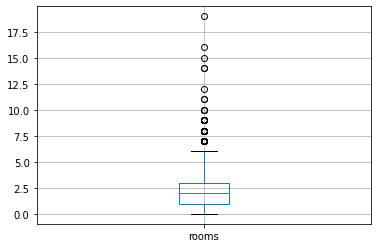

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


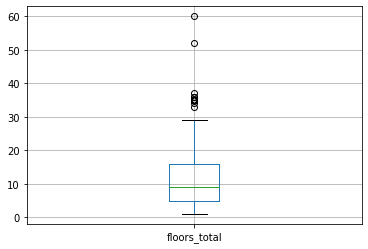

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


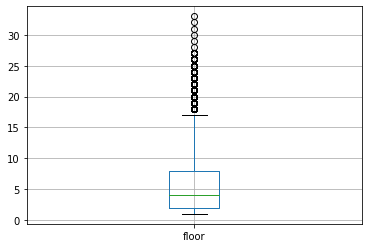

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


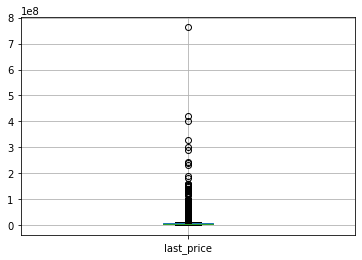

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64


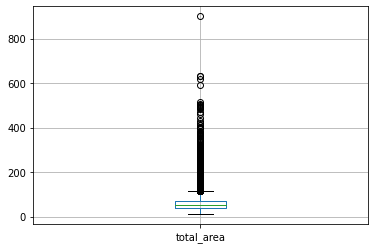

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


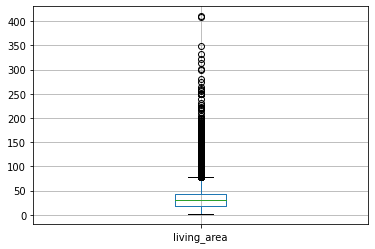

count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


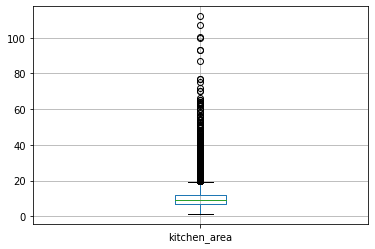

count    21343.000000
mean        10.560994
std          5.900630
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


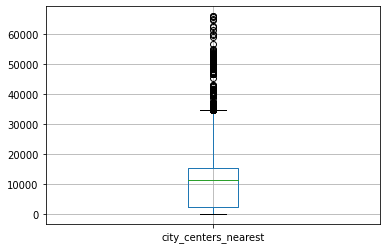

count    23565.000000
mean     10879.530617
std       9639.346166
min          0.000000
25%       2186.000000
50%      11246.000000
75%      15237.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


In [ ]:
data.boxplot(column='rooms')
plt.show()
print(data['rooms'].describe())

data.boxplot(column='floors_total')
plt.show()
print(data['floors_total'].describe())

data.boxplot(column='floor')
plt.show()
print(data['floor'].describe())

data.boxplot(column='last_price')
plt.show()
print(data['last_price'].describe())

data.boxplot(column='total_area')
plt.show()
print(data['total_area'].describe())

data.boxplot(column='living_area')
plt.show()
print(data['living_area'].describe())

data.boxplot(column='kitchen_area')
plt.show()
print(data['kitchen_area'].describe())

data.boxplot(column='city_centers_nearest')
plt.show()
print(data['city_centers_nearest'].describe())

In [ ]:
# удаляем аномальные значения

data = data.query('rooms < 9')
data = data.query('last_price < 30000001')
data = data.query('total_area < 251')
data = data.query('living_area < 201')
data = data.query('kitchen_area < 51')

**Вывод**

Мы избавились от уникальных значений путём приведения к общему виду всех значений, а также избавились от аномальных значений, которые скорее всего были ошибочно сделаны при выставлении недвижимости на продажу. Ещё были удалены аномальные значения, которые не поддавались объяснению

### Посчитайте и добавьте в таблицу новые столбцы

In [ ]:
# новый столбец с ценой 1 кв м
data['price_1m'] = (data['last_price'] / data['total_area']).apply(lambda x: round(x, 2))

# новые столбцы с днём, месяцем и годом размещения
data['day_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

# функция, определяющая категорию этажа
def floor_category(floor):
    if floor['floor'] == floor['floors_total']:
        return 'последний'
    elif floor['floor'] == 1:
        return 'первый'
    return 'другой'

data['floors_category'] = data.apply(floor_category, axis=1)

# переводим расстояние от центра из м в км и приводим к целому числу
data['city_centers_nearest'] = (data['city_centers_nearest'] / 1000).astype(int)

**Вывод**

Колонку с расстоянием от центра города перевели из метров в километры. И были добавлены новые столбцы: цена 1 квадратного метра; день, месяц и год выставления на продажу квартиры; этаж в дома по категориям.

### Исследовательский анализ

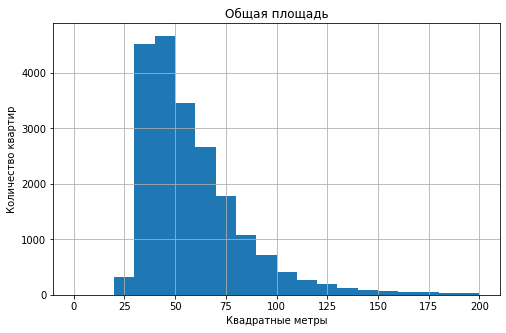

count    20589.000000
mean        58.194393
std         26.178657
min         14.000000
25%         40.200000
50%         52.000000
75%         68.500000
max        250.200000
Name: total_area, dtype: float64


In [ ]:
# строим гистограмму по общей площади объектов недвижимости

#data['total_area'].hist(bins=20, range=(0, 400))
#plt.show()

data['total_area'].plot(kind='hist',
                        bins=20,
                        range=(0, 200),
                        title='Общая площадь',
                        figsize=(8, 5),
                        grid=True)
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

print(data['total_area'].describe())

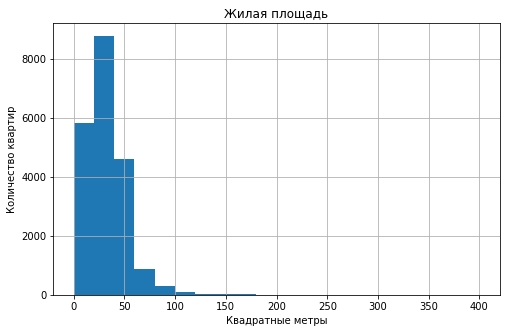

count    20589.000000
mean        33.333287
std         17.567204
min          2.000000
25%         18.620000
50%         30.000000
75%         42.000000
max        176.600000
Name: living_area, dtype: float64


In [ ]:
# строим гистограмму по жилой площади объектов недвижимости

data['living_area'].plot(kind='hist',
                        bins=20,
                        range=(0, 400),
                        title='Жилая площадь',
                        figsize=(8, 5),
                        grid=True)
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

print(data['living_area'].describe())

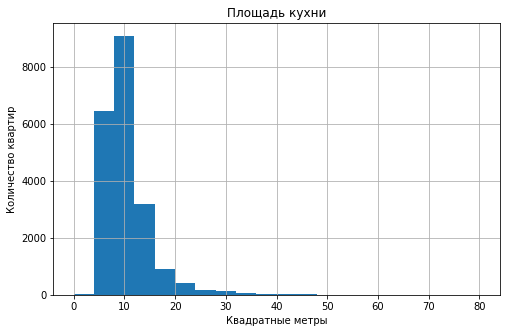

count    20589.000000
mean        10.219184
std          4.875242
min          1.300000
25%          7.000000
50%          9.000000
75%         11.700000
max         50.200000
Name: kitchen_area, dtype: float64


In [ ]:
# строим гистограмму по площади кухонь объектов недвижимости

data['kitchen_area'].plot(kind='hist',
                        bins=20,
                        range=(0, 80),
                        title='Площадь кухни',
                        figsize=(8, 5),
                        grid=True)
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

print(data['kitchen_area'].describe())

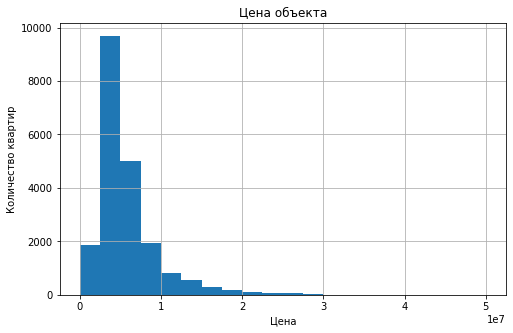

count    2.058900e+04
mean     5.730102e+06
std      3.890587e+06
min      1.219000e+04
25%      3.490000e+06
50%      4.650000e+06
75%      6.650000e+06
max      3.000000e+07
Name: last_price, dtype: float64


In [ ]:
# строим гистограмму по цене объектов недвижимости

data['last_price'].plot(kind='hist',
                        bins=20,
                        range=(0, 50000000),
                        title='Цена объекта',
                        figsize=(8, 5),
                        grid=True)
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()

print(data['last_price'].describe())

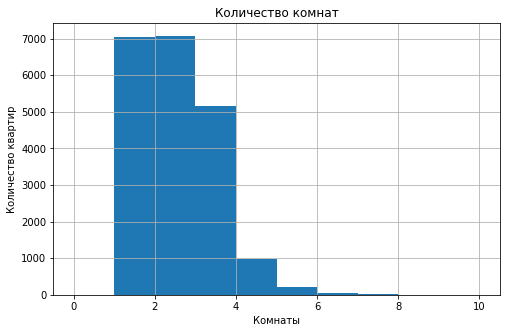

count    20589.000000
mean         2.056826
std          0.986343
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64


In [ ]:
# строим гистограмму по количеству комнат

data['rooms'].plot(kind='hist',
                        bins=10,
                        range=(0, 10),
                        title='Количество комнат',
                        figsize=(8, 5),
                        grid=True)
plt.xlabel('Комнаты')
plt.ylabel('Количество квартир')
plt.show()

print(data['rooms'].describe())

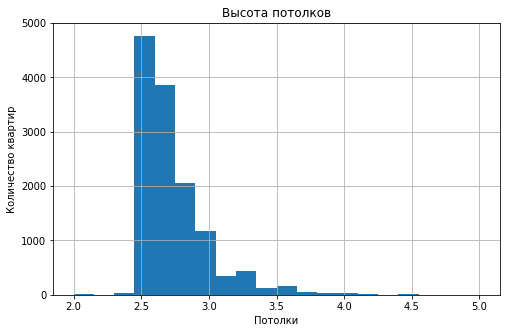

count    20589.000000
mean         1.728706
std          1.328046
min          0.000000
25%          0.000000
50%          2.500000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64


In [ ]:
# строим гистограмму по высоте потолков

data['ceiling_height'].plot(kind='hist',
                        bins=20,
                        range=(2, 5),
                        title='Высота потолков',
                        figsize=(8, 5),
                        grid=True)
plt.xlabel('Потолки')
plt.ylabel('Количество квартир')
plt.show()

print(data['ceiling_height'].describe())

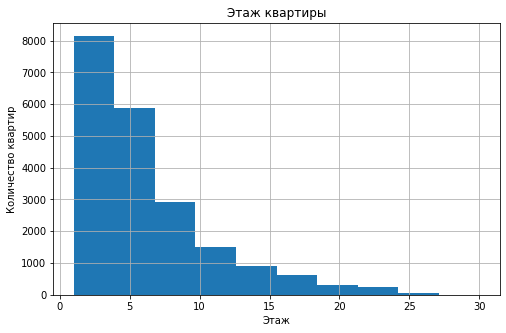

count    20589.000000
mean         5.847686
std          4.830789
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


In [ ]:
# строим гистограмму по этажу

data['floor'].plot(kind='hist',
                        bins=10,
                        range=(1, 30),
                        title='Этаж квартиры',
                        figsize=(8, 5),
                        grid=True)
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

print(data['floor'].describe())

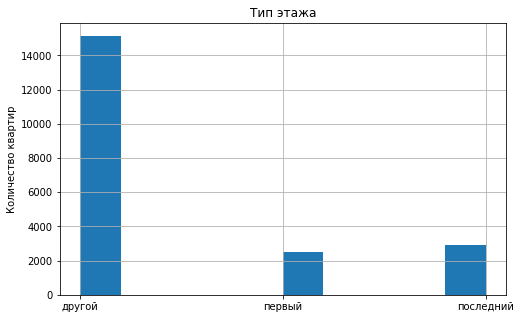

In [ ]:
# строим гистограмму по категории этажа

data['floors_category'].hist(figsize=(8, 5))
plt.title('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()

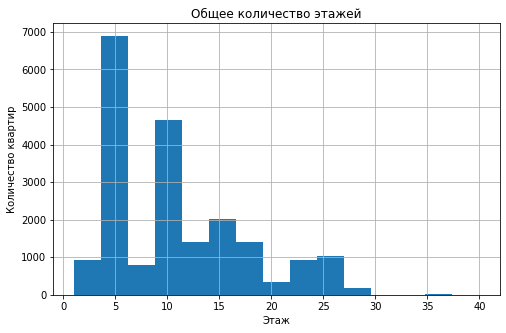

count    20589.000000
mean        10.607509
std          6.539315
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64


In [ ]:
# строим гистограмму по общему количеству этажей в доме

data['floors_total'].plot(kind='hist',
                        bins=15,
                        range=(1, 40),
                        title='Общее количество этажей',
                        figsize=(8, 5),
                        grid=True)
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

print(data['floors_total'].describe())

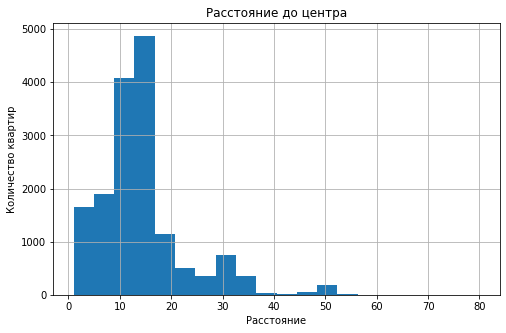

count    20589.000000
mean        10.776677
std          9.581558
min          0.000000
25%          3.000000
50%         11.000000
75%         15.000000
max         65.000000
Name: city_centers_nearest, dtype: float64


In [ ]:
# строим гистограмму по расстоянию до центра города

data['city_centers_nearest'].plot(kind='hist',
                        bins=20,
                        range=(1, 80),
                        title='Расстояние до центра',
                        figsize=(8, 5),
                        grid=True)
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()

print(data['city_centers_nearest'].describe())

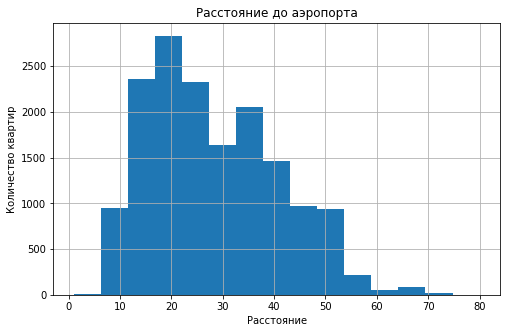

count    20589.000000
mean        21.910778
std         16.311667
min          0.000000
25%         10.000000
50%         21.000000
75%         34.000000
max         84.000000
Name: airports_nearest, dtype: float64


In [ ]:
# строим гистограмму по расстоянию до аэропорта

data['airports_nearest'] = (data['airports_nearest'] / 1000).astype(int)

data['airports_nearest'].plot(kind='hist',
                        bins=15,
                        range=(1, 80),
                        title='Расстояние до аэропорта',
                        figsize=(8, 5),
                        grid=True)
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()

print(data['airports_nearest'].describe())

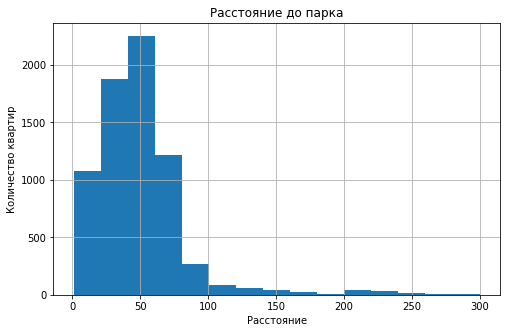

count    7010.000000
mean       49.083024
std        33.843987
min         0.100000
25%        28.900000
50%        45.600000
75%        61.200000
max       319.000000
Name: parks_nearest, dtype: float64


In [ ]:
# строим гистограмму по расстоянию до парка

data['parks_nearest'] = (data['parks_nearest'] / 10).astype(float)

data['parks_nearest'].plot(kind='hist',
                        bins=15,
                        range=(1, 300),
                        title='Расстояние до парка',
                        figsize=(8, 5),
                        grid=True)
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()

print(data['parks_nearest'].describe())

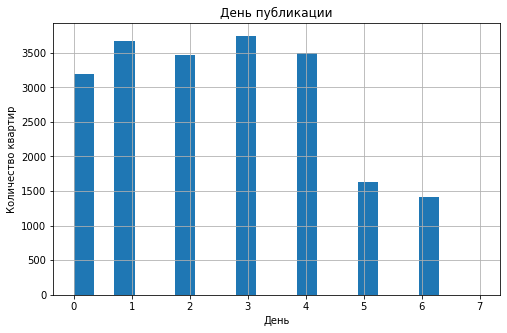

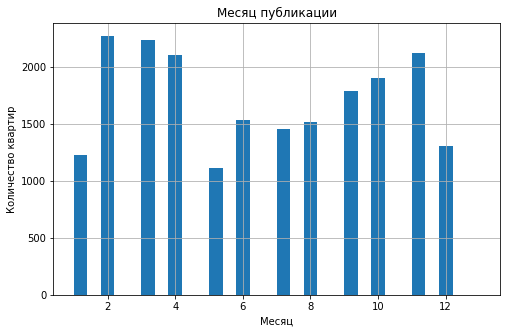

In [ ]:
# строим гистограмму по дню и месяцу выставления объявления

data['day_exposition'].plot(kind='hist',
                        bins=20,
                        range=(0, 7),
                        title='День публикации',
                        figsize=(8, 5),
                        grid=True)
plt.xlabel('День')
plt.ylabel('Количество квартир')
plt.show()

data['month_exposition'].plot(kind='hist',
                        bins=30,
                        range=(1, 13),
                        title='Месяц публикации',
                        figsize=(8, 5),
                        grid=True)
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

***Вывод***

**Общая площадь**

Большинство квартир с площадью 50 кв м. Встречаются объекты с аномальной площадью в 200-300 кв м.

**Жилая площадь**

Основная часть объектов недвижимости имеет жилую площадь в диапазоне от 30 до 40.

**Площадь кухни**

10 квадратных метров - самая частая площадь кухни у продаваемых квартир.

**Цена объекта**

В основном цена квартиры составляет 4-6 миллионов. В датафрейме есть и объявления с ценой > 15-20 миллионов.

**Количество комнат**

В квартирах чаще всего 2 комнаты.

**Высота потолков**

Более половины продаваемых квартир имеют потолки высотой 2.6 метра.

**Этаж квартиры**

В данном случае наблюдается распределение Пуассона, чем выше этаж - тем меньше объявлений.

**Тип этажа квартиры**

Больше всего квартир с этажом из категории "другой", с первым и последним этажами почти в 10 раз реже встречаются.

**Общее количество этажей**

Чуть больше половины квартир находятся в домах с 5-ю или 10-ю этажами.

**Расстояние до центра**:

Медианный показатель составляет 13 км.

**Расстояние до аэропорта**

Больше всего домов с расстоянием - 26 км. Присутствуют также значения более 60 км.

**Расстояние до парка**

В среднем данное расстояние составляет 500 метров.

**День и месяц публикации**

В будние дни объявления выставляют примерно с одинаковой частотой, в выходные дни показатель в 2 раза меньше. Чаще всего публикают квартиры на продажу в феврале, в середине года бывают просадки (возможно связано с тем, что люди уходят в опуск), а под конец снова частота растёт.

#### Скорость продажи квартиры

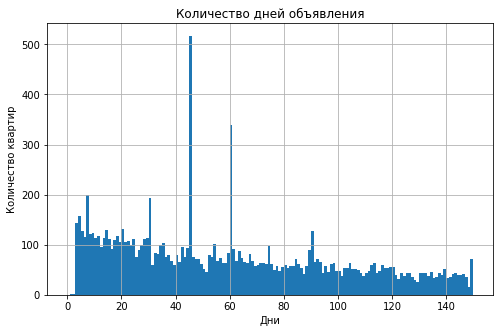

count    17783.000000
mean       183.972952
std        220.324032
min          1.000000
25%         44.000000
50%        101.000000
75%        237.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [ ]:
data['days_exposition'].plot(kind='hist',
                        bins=150,
                        range=(0, 150),
                        title='Количество дней объявления',
                        figsize=(8, 5),
                        grid=True)
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

print(data['days_exposition'].describe())

**Вывод**

Чаще всего квартиру покупают спустя 3 месяца после выставления на продажу. Достаточно быстрыми продажами можно считать те, которые приобрели после 45 дней, к долгим относятся квартиры со сроком от 230 дней. Есть также выбивающиеся значения более 1000 дней.

#### Факторы влияющие на стоимость квартиры

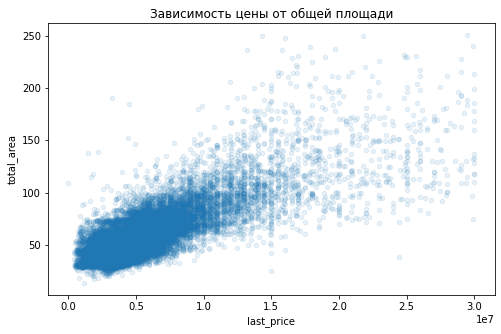

Коэффициент корреляции Пирсона составляет: 0.7896198030386082


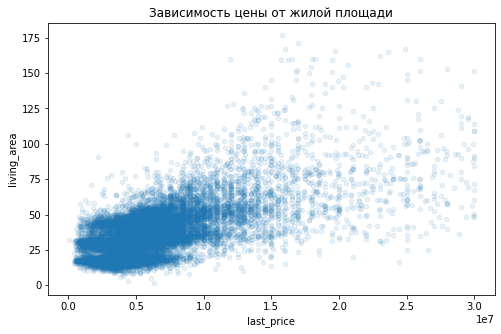

Коэффициент корреляции Пирсона составляет: 0.6794242278537902


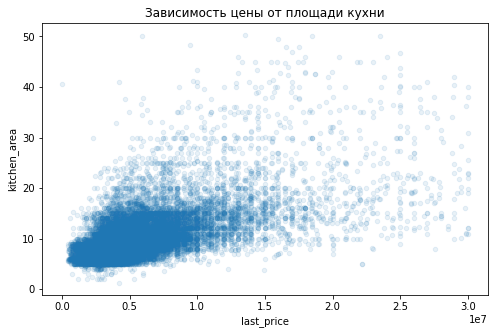

Коэффициент корреляции Пирсона составляет: 0.6042204233901495


In [ ]:
# df = pd.DataFrame(data[['total_area', 'living_area', 'kitchen_area', 'rooms','floors_category']], data['last_price'])
# df.head()
# для упрощения работы хотел создать отдельных датафрейм, чтобы построить матрицу рассеивания,
# возможно не получилось из-за столбца "комнаты" и "категория этажа"
# так вообще можно сделать?

#df = data.pivot_table(index='last_price', values=['total_area', 'living_area', 'kitchen_area', 'rooms','floors_category'])\
#    .style.format({('total_area', 'living_area', 'kitchen_area') : '{:.2f}'})
# то же самое

data.plot(x='last_price',
          y='total_area',
          kind='scatter',
          alpha=0.1,
          title='Зависимость цены от общей площади',
          figsize=(8, 5))
plt.show()
print('Коэффициент корреляции Пирсона составляет:', data['total_area'].corr(data['last_price']))

data.plot(x='last_price',
          y='living_area',
          kind='scatter',
          alpha=0.1,
          title='Зависимость цены от жилой площади',
          figsize=(8, 5))
plt.show()
print('Коэффициент корреляции Пирсона составляет:', data['living_area'].corr(data['last_price']))

data.plot(x='last_price',
          y='kitchen_area',
          kind='scatter',
          alpha=0.1,
          title='Зависимость цены от площади кухни',
          figsize=(8, 5))
plt.show()
print('Коэффициент корреляции Пирсона составляет:', data['kitchen_area'].corr(data['last_price']))

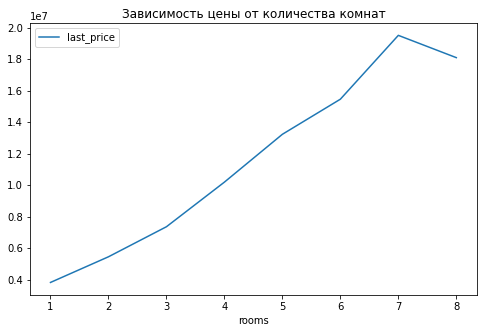

Коэффициент корреляции Пирсона составляет: 0.5136976375920213
Series([], Name: rooms, dtype: int64)


In [ ]:
data.pivot_table(index='rooms', values='last_price')\
    .plot(style='-',
          title='Зависимость цены от количества комнат',
          figsize=(8, 5))
plt.show()

print('Коэффициент корреляции Пирсона составляет:', data['rooms'].corr(data['last_price']))
print(data.query('rooms == 12').groupby('rooms')['rooms'].count())

# пытался сделать срез, чтобы считать количество комнат до 8, но не срабатывало

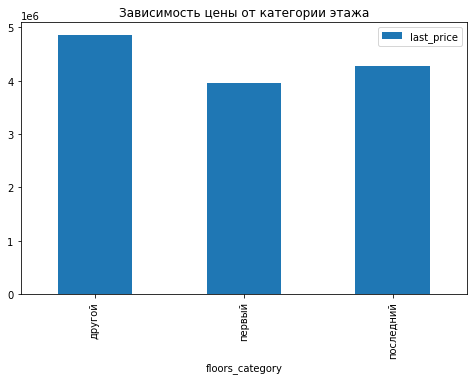

In [ ]:
data.pivot_table(index='floors_category', values='last_price', aggfunc='median')\
    .plot(kind='bar',
          title='Зависимость цены от категории этажа',
          figsize=(8, 5))
plt.show()

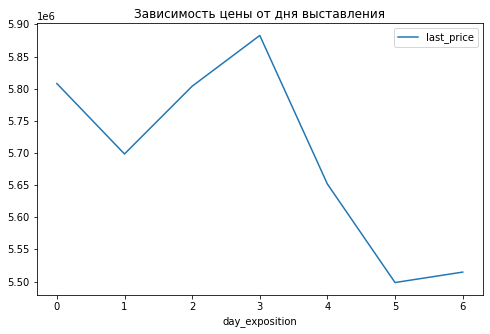

Коэффициент корреляции Пирсона составляет: -0.019021561753699668


In [ ]:
data.pivot_table(index='day_exposition', values='last_price')\
    .plot(style='-',
          title='Зависимость цены от дня выставления',
          figsize=(8, 5))
plt.show()

print('Коэффициент корреляции Пирсона составляет:', data['day_exposition'].corr(data['last_price']))

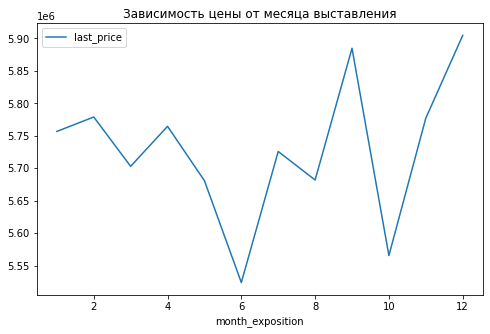

Коэффициент корреляции Пирсона составляет: 0.0027971799392400546


In [ ]:
data.pivot_table(index='month_exposition', values='last_price')\
    .plot(style='-',
          title='Зависимость цены от месяца выставления',
          figsize=(8, 5))
plt.show()

print('Коэффициент корреляции Пирсона составляет:', data['month_exposition'].corr(data['last_price']))

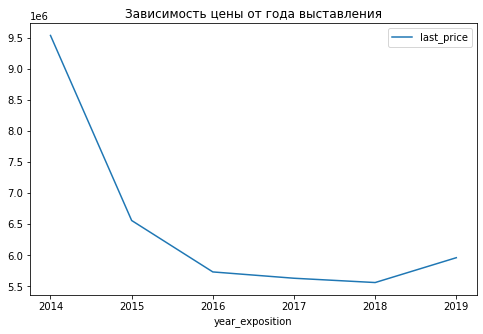

Коэффициент корреляции Пирсона составляет: -0.037001943356129795


In [ ]:
data.pivot_table(index='year_exposition', values='last_price')\
    .plot(style='-',
          title='Зависимость цены от года выставления',
          figsize=(8, 5))
plt.show()

print('Коэффициент корреляции Пирсона составляет:', data['year_exposition'].corr(data['last_price']))

**Вывод**

Больше всего корреляция цены и площади проявляется с общей площадью, что является логичным выводом. С площаью кухни меньше на 0.2.

В среднем рост числа комнат прямо пропорционанел росту цены.

По категориям этажей самая большая связь наблюдается у категории "другой". Меньше всего - у первых.

Корреляция между ценой и днём, месяцем, годом выставления объявления совсем незначительная, почти нулевая.

#### Средняя цена 1 кв м в топ 10 населённых пунктах по количеству объявлений

In [ ]:
# делаем сводные таблицы и сортируем по количеству объявлений

print('Топ 10 населённых пунктов по объявлениям с самой высокой ценой 1 кв м.')
print(data.pivot_table(index='locality_name', values='price_1m', aggfunc=['count', 'median', 'mean'])\
    .sort_values(by=('count', 'price_1m'), ascending=False)\
    .head(10)\
    .sort_values(by=('median', 'price_1m'), ascending=False))
print()
print()
print('Топ 10 населённых пунктов по объявлениям с самой низкой ценой 1 кв м.')
print(data.pivot_table(index='locality_name', values='price_1m', aggfunc=['count', 'median', 'mean'])\
    .sort_values(by=('count', 'price_1m'), ascending=False)\
    .tail(10)\
    .sort_values(by=('median', 'price_1m'), ascending=False))

Топ 10 населённых пунктов по объявлениям с самой высокой ценой 1 кв м.
                     count      median           mean
                  price_1m    price_1m       price_1m
locality_name                                        
санкт-петербург      13728  103658.540  109825.265217
пушкин                 332  100000.000  103078.747681
поселок парголово      288   92271.975   90756.002986
деревня кудрово        226   91715.120   92248.477301
поселок мурино         430   84922.645   85366.547442
поселок шушары         392   77223.320   78393.702270
колпино                321   74722.220   75129.845452
гатчина                290   67746.285   68635.620586
всеволожск             357   65789.470   69029.150056
выборг                 190   58357.385   58319.351737


Топ 10 населённых пунктов по объявлениям с самой низкой ценой 1 кв м.
                                       count    median      mean
                                    price_1m  price_1m  price_1m
locality_name            

**Вывод**

Средняя цена 1 квадратного километра значительно выше у населённых пунктов, находящихся ближе к Санкт-Петербургу, количество объявлений так же больше к близлежащих пунктах.

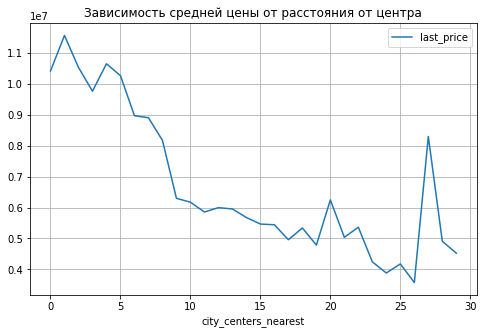

In [ ]:
# строим сводную таблицу и график по срезу из датафрейма

data[data['locality_name'] == 'санкт-петербург'].pivot_table(index='city_centers_nearest', values='last_price')\
                                                .plot(style='-',
                                                      title='Зависимость средней цены от расстояния от центра',
                                                      figsize=(8, 5),
                                                      grid = True)
plt.show()

**Вывод**

Прямая зависимость: чем дальше расстояние от центра, тем ниже цена. Присутствуют несколько подъёмов, которые связаны с маленьким количеством объявлений, поэтому средняя цена чуть выше.

### Общий вывод

В основе анализа лежали данные сервиса Яндекс.Недвижимость - архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

В ходе выполнения проекта были проведены следующие этапы:
1. Открытие и изучение информации о датасете
2. Предобработка данных
- Удаление пропусков и изменение типов данных
- Обработка дубликатов
- Уникальные значения
3. Посчитайте и добавьте в таблицу новые столбцы
4. Проведите исследовательский анализ данных
- Изучение данных
- Скорость продажи квартиры
- Факторы влияющие на стоимость квартиры
- Средняя цена 1 кв м в топ 10 населённых пунктах по количеству объявлений

Результатом исследования стало выявления закономерностей из которых следует, что больше всего объявлений с продажей квартир с *общей площадью 50 кв. м.*, *жилой площадью 35 кв. м.*, *площадью кухни 10 кв. м.*, *2-я комнатами*, *ценой в 5 миллионов*, *высотой полоков 2.6 метра* и *медианным расстоянием до центра в 13 км*.

**Помимо этого, обнаружено, что цена 1 кв. м. становится дороже в населённых пунктах, где больше публикаций квартир. Также чем дальше располагается недвижимость от центра, тем ниже её средняя цена.**